In [2]:
import numpy as np
#import relevant libraries and modules
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model
import pandas as pd

In [3]:
#load data
data_d = datasets.load_diabetes()
X = data_d.data
y = data_d.target
dX = pd.DataFrame(X)
dy = pd.DataFrame(y)
print("Diabetes head", dX.head())
print("Diabetes columns", dX.columns)
#dX.rename(columns={'pop':'population',
                     #     'lifeExp':'life_exp',
                      #    'gdpPercap':'gdp_per_cap'}, 
                 #inplace=True)
print("Diabetes target head", dy.head())
print("Diabetes data set dimensions ", dX.shape)
print("Diabetes target dimensions", dy.shape)

Diabetes head           0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
Diabetes columns RangeIndex(start=0, stop=10, step=1)
Diabetes target head        0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0
Diabetes data set dimensions  (442, 10)
Diabetes target dimensions (442, 1)


In [4]:
#create summary statistics 
dX.describe()
#To interprete this summary statistics

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [5]:
dX.isnull().sum()
dX.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [6]:
dX.corr(method = 'pearson')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


4 and 5 seem highly correlated. 7 and 8 somewhat as well. 6 and 7 are strongly negatively correlated. -> scatterplot

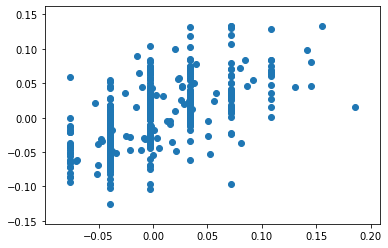

In [7]:
plt.scatter(dX[7], dX[8])
#plt.legend(7, 8)


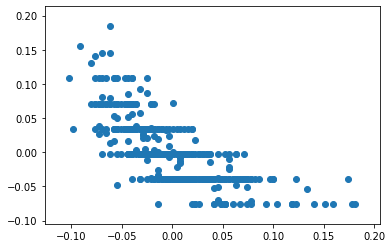

In [8]:
plt.scatter(dX[6], dX[7])

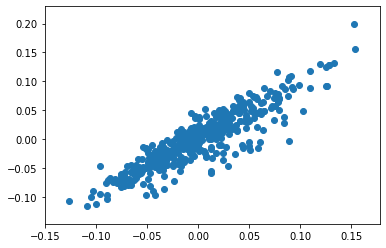

In [9]:
plt.scatter(dX[4], dX[5])

In [ ]:
#A histogram for each column
dX.hist(figsize = (9,9), bins = 50)

In [33]:
kf = KFold(n_splits=5, random_state=3, shuffle=True) 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 


KFold(n_splits=5, random_state=3, shuffle=True)


In [34]:
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [50]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

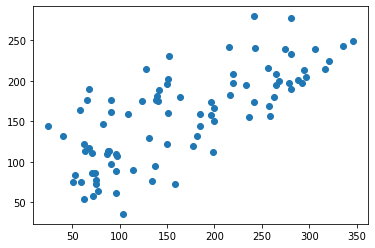

In [61]:
prediction = model.predict(X_test)
plt.scatter(y_test, prediction)

        

In [44]:
score = cross_val_score(model, dX, y, cv = 6)
print("Cross Validation Scores for Linear Regression", score)

Cross Validation Scores for Linear Regression [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


Cross Validation Scores for Ridge [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]


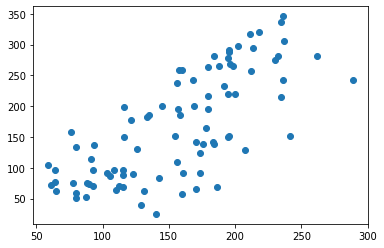

In [45]:
model2 = linear_model.Ridge(alpha = 0.1)
model2.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
plt.scatter(prediction2, y_test)
score2 = cross_val_score(model, dX, y, cv = 5)
print("Cross Validation Scores for Ridge", score2)

[0.32236632 0.32747395 0.328279   0.35983251 0.32265249 0.38478714]


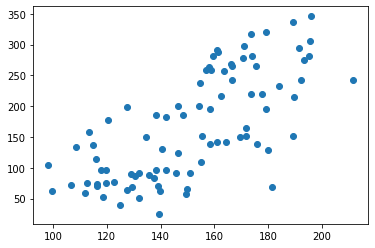

In [38]:
model3 = linear_model.Lasso()
model3.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
plt.scatter(prediction3, y_test)
score3 = cross_val_score(model3, dX, y, cv = 6)
print(score3)